In [2]:
print("Structure")

Structure


In [20]:
import numpy as np

# constants
E=1
A=1

# structure geometry 
node_coord=np.array([[0,0],[0,2],[2,0],[2,2]]) # nodes coordinates
elem_con=np.array([[1,0],[0,2],[2,3],[1,3]]) # elements connectivity

x=node_coord[:,0] # sliced array with only x node coordinates
y=node_coord[:,1] # sliced array with only y node coordinates
node_count=len(node_coord)
elem_count=len(elem_con)
struct_dof=2*node_count # (entire) structure degrees of freedom

# matrices initialization
displacement=np.zeros((struct_dof,1))
force=np.zeros((struct_dof,1))
sigma=np.zeros((elem_count,1))
stiffness=np.zeros((struct_dof,struct_dof))

# load assignments

force[1]=-2
 
# computations
for e in range(elem_count):
    index = elem_con[e]
    elem_dof = np.array([index[0]*2, index[0]*2+1, index[1]*2, index[1]*2+1])
    print(f"For Element {e+1} (Indices {index}):")
    print("  elem_dof =", elem_dof)

For Element 1 (Indices [1 0]):
  elem_dof = [2 3 0 1]
For Element 2 (Indices [0 2]):
  elem_dof = [0 1 4 5]
For Element 3 (Indices [2 3]):
  elem_dof = [4 5 6 7]
For Element 4 (Indices [1 3]):
  elem_dof = [2 3 6 7]


In [38]:
import numpy as np

# constants
E=1
A=1

# structure geometry 
node_coord=np.array([[0,0],[3,0],[3,4]]) # nodes coordinates
elem_con=np.array([[0,1],[0,2]]) # elements connectivity

x=node_coord[:,0] # sliced array with only x node coordinates
y=node_coord[:,1] # sliced array with only y node coordinates
node_count=len(node_coord)
elem_count=len(elem_con)
struct_dof=2*node_count # (entire) structure degrees of freedom

# matrices initialization
displacement=np.zeros((struct_dof,1))
force=np.zeros((struct_dof,1))
sigma=np.zeros((elem_count,1))
stiffness=np.zeros((struct_dof,struct_dof))

# load assignments

force[1]=-2
 
# computations
for e in range(elem_count):
	index=elem_con[e]
	elem_dof=np.array([index[0]*2, index[0]*2+1, index[1]*2, index[1]*2+1])
	xl=x[index[1]]-x[index[0]]
	yl=y[index[1]]-y[index[0]]
	elem_length=np.sqrt(xl*xl+yl*yl)
	c=xl/elem_length
	s=yl/elem_length
	rot=np.array([[c*c, c*s, -c*c, -c*s],
                  [c*s, s*s, -c*s, -s*s],
                  [-c*c, -c*s, c*c, c*s],
                  [-c*s, -s*s, c*s, s*s]])
	k=(E*A/elem_length)*rot
	stiffness[np.ix_(elem_dof, elem_dof)] +=k

suppress_dof=np.array([2,3,4,5]) # constrained degrees of freedom
active_dof=np.setdiff1d(np.arange(struct_dof), suppress_dof)
displacement_aux=np.linalg.solve(stiffness[np.ix_(active_dof,active_dof)], force[np.ix_(active_dof)])
displacement[np.ix_(active_dof)]=displacement_aux
react=np.dot(stiffness, displacement)

for e in range(elem_count):
	index=elem_con[e]
	elem_dof=np.array([index[0]*2, index[0]*2+1, index[1]*2, index[1]*2+1])
	print(f"For Element {e+1} (Indices {index}):")
	print("  elem_dof =", elem_dof)
	xl=x[index[1]]-x[index[0]]
	yl=y[index[1]]-y[index[0]]
	elem_length=np.sqrt(xl*xl+yl*yl)
	c=xl/elem_length
	s=yl/elem_length
	sigma[e]=(E/elem_length)*np.dot(np.array([-c,-s,c,s]), displacement[np.ix_(elem_dof)])

# emitting results to screen
print(f'displacements:\n {displacement}')
print(f'stress:\n {sigma}')

For Element 1 (Indices [0 1]):
  elem_dof = [0 1 2 3]
For Element 2 (Indices [0 2]):
  elem_dof = [0 1 4 5]
displacements:
 [[  4.5]
 [-19. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]]
stress:
 [[-1.5]
 [ 2.5]]


In [2]:
import numpy as np

# constants
E=1
A=1

# structure geometry 
# structure geometry 
# structure geometry 
node_coord=np.array([[0,0],[0,2],[2,0],[2,2]]) # nodes coordinates
elem_con=np.array([[0,2],[0,1],[1,3],[2,3],[1,2],[0,3]]) # elements connectivity

x=node_coord[:,0] # sliced array with only x node coordinates
y=node_coord[:,1] # sliced array with only y node coordinates
node_count=len(node_coord)
elem_count=len(elem_con)
struct_dof=2*node_count # (entire) structure degrees of freedom

# matrices initialization
displacement=np.zeros((struct_dof,1))
force=np.zeros((struct_dof,1))
sigma=np.zeros((elem_count,1))
stiffness=np.zeros((struct_dof,struct_dof))

suppress_dof=np.array([4,6,7]) # constrained degrees of freedom
# load assignments

force[0] = 2  # for the x-displacement
force[1] = -4  # for the y-displacement


for e in range(elem_count):
    index = elem_con[e]
    elem_dof = np.array([index[0]*2, index[0]*2+1, index[1]*2, index[1]*2+1])
    print(f"For Element {e+1} (Indices {index}):")
    print("  elem_dof =", elem_dof)
    xl = x[index[1]] - x[index[0]]  # corrected indentation
    yl = y[index[1]] - y[index[0]]  # corrected indentation
    elem_length = np.sqrt(xl * xl + yl * yl)  # corrected indentation
    c = xl / elem_length  # corrected indentation
    s = yl / elem_length  # corrected indentation
    rot = np.array([[c*c, c*s, -c*c, -c*s],
                    [c*s, s*s, -c*s, -s*s],
                    [-c*c, -c*s, c*c, c*s],
                    [-c*s, -s*s, c*s, s*s]])
    k = (E * A / elem_length) * rot
    stiffness[np.ix_(elem_dof, elem_dof)] += k




active_dof=np.setdiff1d(np.arange(struct_dof), suppress_dof)
displacement_aux=np.linalg.solve(stiffness[np.ix_(active_dof,active_dof)], force[np.ix_(active_dof)])
displacement[np.ix_(active_dof)]=displacement_aux
react=np.dot(stiffness, displacement)

for e in range(elem_count):
	index=elem_con[e]
	elem_dof=np.array([index[0]*2, index[0]*2+1, index[1]*2, index[1]*2+1])
	xl=x[index[1]]-x[index[0]]
	yl=y[index[1]]-y[index[0]]
	elem_length=np.sqrt(xl*xl+yl*yl)
	c=xl/elem_length
	s=yl/elem_length
	sigma[e]=(E/elem_length)*np.dot(np.array([-c,-s,c,s]), displacement[np.ix_(elem_dof)])

# emitting results to screen
print(f'displacements:\n {displacement}')


For Element 1 (Indices [0 2]):
  elem_dof = [0 1 4 5]
For Element 2 (Indices [0 1]):
  elem_dof = [0 1 2 3]
For Element 3 (Indices [1 3]):
  elem_dof = [2 3 6 7]
For Element 4 (Indices [2 3]):
  elem_dof = [4 5 6 7]
For Element 5 (Indices [1 2]):
  elem_dof = [2 3 4 5]
For Element 6 (Indices [0 3]):
  elem_dof = [0 1 6 7]
displacements:
 [[  8.41421356]
 [-20.89949494]
 [ -3.58578644]
 [-17.3137085 ]
 [  0.        ]
 [ -3.58578644]
 [  0.        ]
 [  0.        ]]


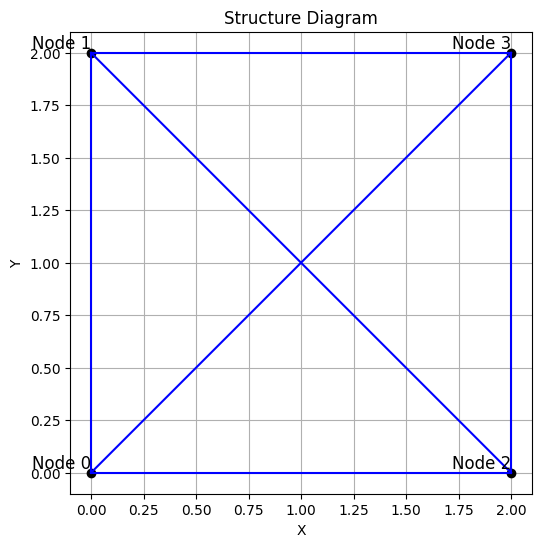

In [49]:
import matplotlib.pyplot as plt

# Plotting the structure
plt.figure(figsize=(8, 6))

# Plotting nodes
for i, (x_coord, y_coord) in enumerate(node_coord):
    plt.plot(x_coord, y_coord, 'ko')  # Plotting nodes as black circles
    plt.text(x_coord, y_coord, f'Node {i}', fontsize=12, ha='right', va='bottom')

# Plotting elements
for i, (node1, node2) in enumerate(elem_con):
    x1, y1 = node_coord[node1]
    x2, y2 = node_coord[node2]
    plt.plot([x1, x2], [y1, y2], 'b-')  # Plotting elements as blue lines

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Structure Diagram')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


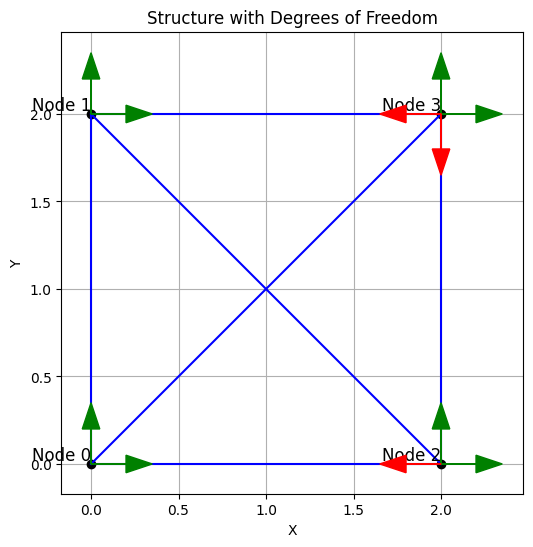

In [58]:
import matplotlib.pyplot as plt

# Plotting the structure
plt.figure(figsize=(8, 6))

# Plotting nodes
for i, (x_coord, y_coord) in enumerate(node_coord):
    plt.plot(x_coord, y_coord, 'ko')  # Plotting nodes as black circles
    plt.text(x_coord, y_coord, f'Node {i}', fontsize=12, ha='right', va='bottom')

# Plotting elements
for i, (node1, node2) in enumerate(elem_con):
    x1, y1 = node_coord[node1]
    x2, y2 = node_coord[node2]
    plt.plot([x1, x2], [y1, y2], 'b-')  # Plotting elements as blue lines

# Plot arrows for degrees of freedom
for i in range(node_count):
    # Plot green arrows for degrees of freedom
    plt.arrow(node_coord[i, 0], node_coord[i, 1], 0.2, 0, color='green', head_width=0.1, zorder=10)
    plt.arrow(node_coord[i, 0], node_coord[i, 1], 0, 0.2, color='green', head_width=0.1, zorder=10)

# Plot arrows for restricted degrees of freedom
for dof in suppress_dof:
    node_index = dof // 2
    x = (node_coord[node_index, 0])
    y = (node_coord[node_index, 1])
    if dof % 2 == 0:  # x-displacement
        plt.arrow(x, y, -0.2, 0, color='red', head_width=0.1, zorder=10)
    else:  # y-displacement
        plt.arrow(x, y, 0, -0.2, color='red', head_width=0.1, zorder=10)

plt.title('Structure with Degrees of Freedom')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


TypeError: can only concatenate list (not "float") to list

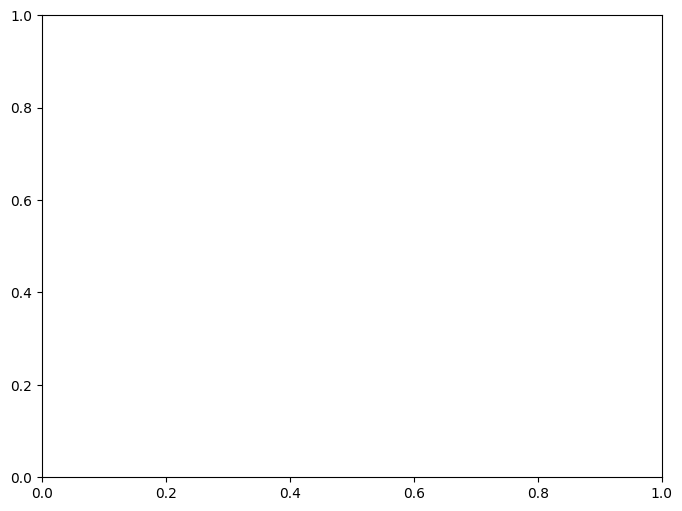

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.arrow([1, 2], [3, 2], 0.2, 0, color='green', head_width=0.1, zorder=10)
plt.show()

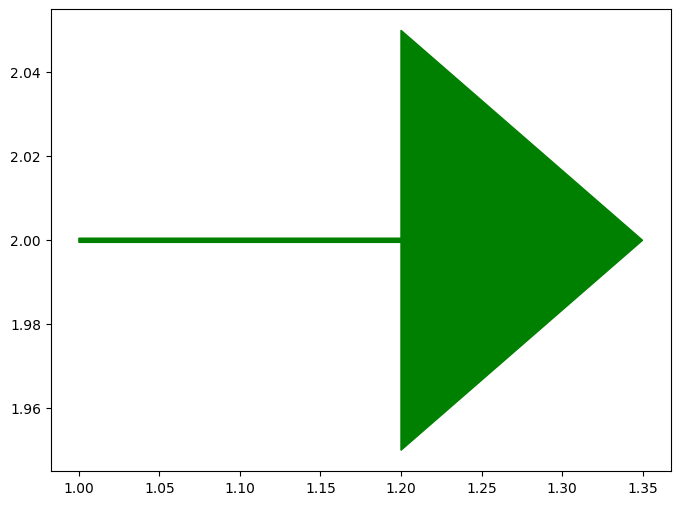

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.arrow(float(1), float(2), 0.2, 0, color='green', head_width=0.1, zorder=10)
plt.show()